In [5]:
import pandas as pd
import geopandas as gpd
import requests
import lxml.html as lh
from bs4 import BeautifulSoup
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [7]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [8]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


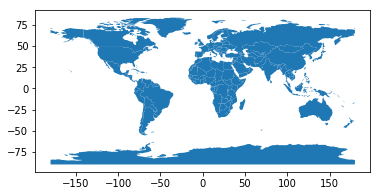

In [9]:
world.plot()

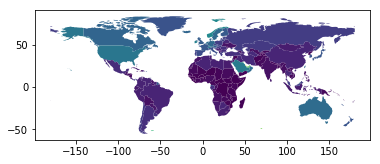

In [10]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap');

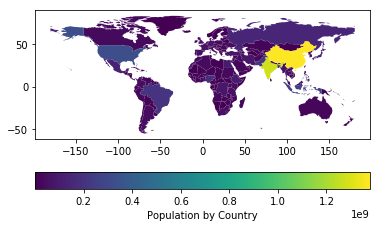

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

world.plot(column='pop_est',ax=ax,legend=True,legend_kwds={'label': "Population by Country",'orientation': "horizontal"})

In [12]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

counties["features"][0]

{'type': 'Feature',
 'properties': {'GEO_ID': '0500000US01001',
  'STATE': '01',
  'COUNTY': '001',
  'NAME': 'Autauga',
  'LSAD': 'County',
  'CENSUSAREA': 594.436},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-86.496774, 32.344437],
    [-86.717897, 32.402814],
    [-86.814912, 32.340803],
    [-86.890581, 32.502974],
    [-86.917595, 32.664169],
    [-86.71339, 32.661732],
    [-86.714219, 32.705694],
    [-86.413116, 32.707386],
    [-86.411172, 32.409937],
    [-86.496774, 32.344437]]]},
 'id': '01001'}

In [15]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

import plotly.express as px

fig = px.choropleth(df, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ModuleNotFoundError: No module named 'plotly.express'

In [53]:
Andrews = pd.read_html("ANDREWS - Annual Totals Query Results.html")

# Make a GET request to fetch the raw HTML content
html_content = requests.get(Andrews).text

# Parse the html content
soup = BeautifulSoup(html_content, "lxml")
print(soup.prettify())

InvalidSchema: No connection adapters were found for '[    0   1   2
0 NaN NaN NaN
1 NaN NaN NaN,     0                                1
0 NaN  Oil & Gas Production Data Query,                           0                                              1  \
0                       NaN                                            NaN   
1                       NaN                  Production Data FAQs PDQ Help   
2           Production Data                                            NaN   
3                       NaN                                            NaN   
4                       NaN  General Production Query Specific Lease Query   
5  General Production Query                                            NaN   

                          2   3                     4   5         6   7  
0                       NaN NaN                   NaN NaN       NaN NaN  
1           Production Data NaN                  FAQs NaN  PDQ Help NaN  
2                      FAQs NaN              PDQ Help NaN       NaN NaN  
3                       NaN NaN                   NaN NaN       NaN NaN  
4  General Production Query NaN  Specific Lease Query NaN       NaN NaN  
5      Specific Lease Query NaN                   NaN NaN       NaN NaN  ,                  0   1     2   3         4   5
0  Production Data NaN  FAQs NaN  PDQ Help NaN,                           0   1                     2   3
0  General Production Query NaN  Specific Lease Query NaN,                                                    0  \
0  General Production Query Results Related Links...   
1                                      Related Links   
2                                      O&G Directory   
3                             O&G Proration Schedule   
4                                Offshore County Map   
5                                        Query Path:   
6                                        Date Range:   

                                                   1              2  \
0                                      Related Links  O&G Directory   
1                                                NaN            NaN   
2                                                NaN            NaN   
3                                                NaN            NaN   
4                                                NaN            NaN   
5                   Search Criteria > County ANDREWS            NaN   
6  Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov De...            NaN   

                        3                    4            5  \
0  O&G Proration Schedule  Offshore County Map  Query Path:   
1                     NaN                  NaN          NaN   
2                     NaN                  NaN          NaN   
3                     NaN                  NaN          NaN   
4                     NaN                  NaN          NaN   
5                     NaN                  NaN          NaN   
6                     NaN                  NaN          NaN   

                                  6            7  \
0  Search Criteria > County ANDREWS  Date Range:   
1                               NaN          NaN   
2                               NaN          NaN   
3                               NaN          NaN   
4                               NaN          NaN   
5                               NaN          NaN   
6                               NaN          NaN   

                                                   8  
0  Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov De...  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4                                                NaN  
5                                                NaN  
6                                                NaN  ,                         0
0           Related Links
1           O&G Directory
2  O&G Proration Schedule
3     Offshore County Map,              0                                                  1
0  Query Path:                   Search Criteria > County ANDREWS
1  Date Range:  Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov De...,                                                   0                  1    \
0                                                 NaN                NaN   
1                                            View by:     Monthly Totals   
2   County Statewide OnshoreAnnual Totals, Jan 200...  View Page By Page   
3                                   View Page By Page                NaN   
4                                                Date         Oil  (BBL)   
5                                                2000           26364410   
6                                                2001           26203100   
7                                                2002           26872306   
8                                                2003           24272737   
9                                                2004           23348254   
10                                               2005           23970611   
11                                               2006           24443531   
12                                               2007           24170708   
13                                               2008           24360768   
14                                               2009           23615953   
15                                               2010           25804569   
16                                               2011           28908519   
17                                               2012           33372281   
18                                               2013           34579913   
19                                               2014           37678529   
20                                               2015           38018986   
21                                               2016           36995311   
22                                               2017           37473105   
23                                               2018           42411085   
24                                               2019           37291304   
25                                               2020            2849273   
26                                              Total          603005253   
27                                                NaN                NaN   

                                                  2              3    \
0   View by: Monthly Totals  Annual Totals  County...       View by:   
1                                                 NaN  Annual Totals   
2                                                Date     Oil  (BBL)   
3                                                 NaN            NaN   
4                                   Casinghead  (MCF)  GW Gas  (MCF)   
5                                            33763574        2345600   
6                                            35714030        2221173   
7                                            37300913        1908045   
8                                            28537088        1890207   
9                                            28706920        1682591   
10                                           28731478        1525041   
11                                           28441289        1709325   
12                                           27635561        1676288   
13                                           27436209        1527775   
14                                           28616599        1908985   
15                                           33875156        1860061   
16                                           38849632        1378228   
17                                           47145272         950108   
18                                           51968942         723292   
19                                           59392358         643132   
20                                           61669698        1033976   
21                                           63398143        3604912   
22                                           61986646        3814550   
23                                           67867260        4309747   
24                                           63211863        4007896   
25                                            4929235         248055   
26                                          859177866       40968987   
27                                                NaN            NaN   

                  4              5                  6      7         8    \
0      Monthly Totals            NaN      Annual Totals    NaN    County   
1                 NaN         County                NaN  Field       NaN   
2   Casinghead  (MCF)  GW Gas  (MCF)  Condensate  (BBL)   2000  26364410   
3                 NaN            NaN                NaN    NaN       NaN   
4   Condensate  (BBL)            NaN                NaN    NaN       NaN   
5                4718            NaN                NaN    NaN       NaN   
6                4109            NaN                NaN    NaN       NaN   
7                3602            NaN                NaN    NaN       NaN   
8                2724            NaN                NaN    NaN       NaN   
9                2843            NaN                NaN    NaN       NaN   
10               3378            NaN                NaN    NaN       NaN   
11               4522            NaN                NaN    NaN       NaN   
12               7737            NaN                NaN    NaN       NaN   
13               7445            NaN                NaN    NaN       NaN   
14              10336            NaN                NaN    NaN       NaN   
15              15879            NaN                NaN    NaN       NaN   
16              19247            NaN                NaN    NaN       NaN   
17               8954            NaN                NaN    NaN       NaN   
18               6227            NaN                NaN    NaN       NaN   
19               5690            NaN                NaN    NaN       NaN   
20              71815            NaN                NaN    NaN       NaN   
21             374857            NaN                NaN    NaN       NaN   
22             284645            NaN                NaN    NaN       NaN   
23             387833            NaN                NaN    NaN       NaN   
24             363401            NaN                NaN    NaN       NaN   
25              19844            NaN                NaN    NaN       NaN   
26            1609806            NaN                NaN    NaN       NaN   
27                NaN            NaN                NaN    NaN       NaN   

         9      ...         124        125        126       127      128  \
0        NaN    ...      2020.0  2849273.0  4929235.0  248055.0  19844.0   
1   Operator    ...         NaN        NaN        NaN       NaN      NaN   
2   33763574    ...         NaN        NaN        NaN       NaN      NaN   
3        NaN    ...         NaN        NaN        NaN       NaN      NaN   
4        NaN    ...         NaN        NaN        NaN       NaN      NaN   
5        NaN    ...         NaN        NaN        NaN       NaN      NaN   
6        NaN    ...         NaN        NaN        NaN       NaN      NaN   
7        NaN    ...         NaN        NaN        NaN       NaN      NaN   
8        NaN    ...         NaN        NaN        NaN       NaN      NaN   
9        NaN    ...         NaN        NaN        NaN       NaN      NaN   
10       NaN    ...         NaN        NaN        NaN       NaN      NaN   
11       NaN    ...         NaN        NaN        NaN       NaN      NaN   
12       NaN    ...         NaN        NaN        NaN       NaN      NaN   
13       NaN    ...         NaN        NaN        NaN       NaN      NaN   
14       NaN    ...         NaN        NaN        NaN       NaN      NaN   
15       NaN    ...         NaN        NaN        NaN       NaN      NaN   
16       NaN    ...         NaN        NaN        NaN       NaN      NaN   
17       NaN    ...         NaN        NaN        NaN       NaN      NaN   
18       NaN    ...         NaN        NaN        NaN       NaN      NaN   
19       NaN    ...         NaN        NaN        NaN       NaN      NaN   
20       NaN    ...         NaN        NaN        NaN       NaN      NaN   
21       NaN    ...         NaN        NaN        NaN       NaN      NaN   
22       NaN    ...         NaN        NaN        NaN       NaN      NaN   
23       NaN    ...         NaN        NaN        NaN       NaN      NaN   
24       NaN    ...         NaN        NaN        NaN       NaN      NaN   
25       NaN    ...         NaN        NaN        NaN       NaN      NaN   
26       NaN    ...         NaN        NaN        NaN       NaN      NaN   
27       NaN    ...         NaN        NaN        NaN       NaN      NaN   

      129          130          131         132        133  
0   Total  603005253.0  859177866.0  40968987.0  1609806.0  
1     NaN          NaN          NaN         NaN        NaN  
2     NaN          NaN          NaN         NaN        NaN  
3     NaN          NaN          NaN         NaN        NaN  
4     NaN          NaN          NaN         NaN        NaN  
5     NaN          NaN          NaN         NaN        NaN  
6     NaN          NaN          NaN         NaN        NaN  
7     NaN          NaN          NaN         NaN        NaN  
8     NaN          NaN          NaN         NaN        NaN  
9     NaN          NaN          NaN         NaN        NaN  
10    NaN          NaN          NaN         NaN        NaN  
11    NaN          NaN          NaN         NaN        NaN  
12    NaN          NaN          NaN         NaN        NaN  
13    NaN          NaN          NaN         NaN        NaN  
14    NaN          NaN          NaN         NaN        NaN  
15    NaN          NaN          NaN         NaN        NaN  
16    NaN          NaN          NaN         NaN        NaN  
17    NaN          NaN          NaN         NaN        NaN  
18    NaN          NaN          NaN         NaN        NaN  
19    NaN          NaN          NaN         NaN        NaN  
20    NaN          NaN          NaN         NaN        NaN  
21    NaN          NaN          NaN         NaN        NaN  
22    NaN          NaN          NaN         NaN        NaN  
23    NaN          NaN          NaN         NaN        NaN  
24    NaN          NaN          NaN         NaN        NaN  
25    NaN          NaN          NaN         NaN        NaN  
26    NaN          NaN          NaN         NaN        NaN  
27    NaN          NaN          NaN         NaN        NaN  

[28 rows x 134 columns],          0               1   2              3   4       5   6      7   8   \
0  View by:  Monthly Totals NaN  Annual Totals NaN  County NaN  Field NaN   

         9   10     11  12        13  
0  Operator NaN  Lease NaN  District  ,                                                   0                  1    \
0   County Statewide OnshoreAnnual Totals, Jan 200...  View Page By Page   
1                                   View Page By Page                NaN   
2                                                Date         Oil  (BBL)   
3                                                2000           26364410   
4                                                2001           26203100   
5                                                2002           26872306   
6                                                2003           24272737   
7                                                2004           23348254   
8                                                2005           23970611   
9                                                2006           24443531   
10                                               2007           24170708   
11                                               2008           24360768   
12                                               2009           23615953   
13                                               2010           25804569   
14                                               2011           28908519   
15                                               2012           33372281   
16                                               2013           34579913   
17                                               2014           37678529   
18                                               2015           38018986   
19                                               2016           36995311   
20                                               2017           37473105   
21                                               2018           42411085   
22                                               2019           37291304   
23                                               2020            2849273   
24                                              Total          603005253   

                  2              3                  4              5    \
0                Date     Oil  (BBL)  Casinghead  (MCF)  GW Gas  (MCF)   
1                 NaN            NaN                NaN            NaN   
2   Casinghead  (MCF)  GW Gas  (MCF)  Condensate  (BBL)            NaN   
3            33763574        2345600               4718            NaN   
4            35714030        2221173               4109            NaN   
5            37300913        1908045               3602            NaN   
6            28537088        1890207               2724            NaN   
7            28706920        1682591               2843            NaN   
8            28731478        1525041               3378            NaN   
9            28441289        1709325               4522            NaN   
10           27635561        1676288               7737            NaN   
11           27436209        1527775               7445            NaN   
12           28616599        1908985              10336            NaN   
13           33875156        1860061              15879            NaN   
14           38849632        1378228              19247            NaN   
15           47145272         950108               8954            NaN   
16           51968942         723292               6227            NaN   
17           59392358         643132               5690            NaN   
18           61669698        1033976              71815            NaN   
19           63398143        3604912             374857            NaN   
20           61986646        3814550             284645            NaN   
21           67867260        4309747             387833            NaN   
22           63211863        4007896             363401            NaN   
23            4929235         248055              19844            NaN   
24          859177866       40968987            1609806            NaN   

                  6       7           8           9      ...         107  \
0   Condensate  (BBL)  2000.0  26364410.0  33763574.0    ...      2020.0   
1                 NaN     NaN         NaN         NaN    ...         NaN   
2                 NaN     NaN         NaN         NaN    ...         NaN   
3                 NaN     NaN         NaN         NaN    ...         NaN   
4                 NaN     NaN         NaN         NaN    ...         NaN   
5                 NaN     NaN         NaN         NaN    ...         NaN   
6                 NaN     NaN         NaN         NaN    ...         NaN   
7                 NaN     NaN         NaN         NaN    ...         NaN   
8                 NaN     NaN         NaN         NaN    ...         NaN   
9                 NaN     NaN         NaN         NaN    ...         NaN   
10                NaN     NaN         NaN         NaN    ...         NaN   
11                NaN     NaN         NaN         NaN    ...         NaN   
12                NaN     NaN         NaN         NaN    ...         NaN   
13                NaN     NaN         NaN         NaN    ...         NaN   
14                NaN     NaN         NaN         NaN    ...         NaN   
15                NaN     NaN         NaN         NaN    ...         NaN   
16                NaN     NaN         NaN         NaN    ...         NaN   
17                NaN     NaN         NaN         NaN    ...         NaN   
18                NaN     NaN         NaN         NaN    ...         NaN   
19                NaN     NaN         NaN         NaN    ...         NaN   
20                NaN     NaN         NaN         NaN    ...         NaN   
21                NaN     NaN         NaN         NaN    ...         NaN   
22                NaN     NaN         NaN         NaN    ...         NaN   
23                NaN     NaN         NaN         NaN    ...         NaN   
24                NaN     NaN         NaN         NaN    ...         NaN   

          108        109       110      111    112          113          114  \
0   2849273.0  4929235.0  248055.0  19844.0  Total  603005253.0  859177866.0   
1         NaN        NaN       NaN      NaN    NaN          NaN          NaN   
2         NaN        NaN       NaN      NaN    NaN          NaN          NaN   
3         NaN        NaN       NaN      NaN    NaN          NaN          NaN   
4         NaN        NaN       NaN      NaN    NaN          NaN          NaN   
5         NaN        NaN       NaN      NaN    NaN          NaN          NaN   
6         NaN        NaN       NaN      NaN    NaN          NaN          NaN   
7         NaN        NaN       NaN      NaN    NaN          NaN          NaN   
8         NaN        NaN       NaN      NaN    NaN          NaN          NaN   
9         NaN        NaN       NaN      NaN    NaN          NaN          NaN   
10        NaN        NaN       NaN      NaN    NaN          NaN          NaN   
11        NaN        NaN       NaN      NaN    NaN          NaN          NaN   
12        NaN        NaN       NaN      NaN    NaN          NaN          NaN   
13        NaN        NaN       NaN      NaN    NaN          NaN          NaN   
14        NaN        NaN       NaN      NaN    NaN          NaN          NaN   
15        NaN        NaN       NaN      NaN    NaN          NaN          NaN   
16        NaN        NaN       NaN      NaN    NaN          NaN          NaN   
17        NaN        NaN       NaN      NaN    NaN          NaN          NaN   
18        NaN        NaN       NaN      NaN    NaN          NaN          NaN   
19        NaN        NaN       NaN      NaN    NaN          NaN          NaN   
20        NaN        NaN       NaN      NaN    NaN          NaN          NaN   
21        NaN        NaN       NaN      NaN    NaN          NaN          NaN   
22        NaN        NaN       NaN      NaN    NaN          NaN          NaN   
23        NaN        NaN       NaN      NaN    NaN          NaN          NaN   
24        NaN        NaN       NaN      NaN    NaN          NaN          NaN   

           115        116  
0   40968987.0  1609806.0  
1          NaN        NaN  
2          NaN        NaN  
3          NaN        NaN  
4          NaN        NaN  
5          NaN        NaN  
6          NaN        NaN  
7          NaN        NaN  
8          NaN        NaN  
9          NaN        NaN  
10         NaN        NaN  
11         NaN        NaN  
12         NaN        NaN  
13         NaN        NaN  
14         NaN        NaN  
15         NaN        NaN  
16         NaN        NaN  
17         NaN        NaN  
18         NaN        NaN  
19         NaN        NaN  
20         NaN        NaN  
21         NaN        NaN  
22         NaN        NaN  
23         NaN        NaN  
24         NaN        NaN  

[25 rows x 117 columns],                    0
0  View Page By Page,         0           1                  2              3                  4
0    Date  Oil  (BBL)  Casinghead  (MCF)  GW Gas  (MCF)  Condensate  (BBL)
1    2000    26364410           33763574        2345600               4718
2    2001    26203100           35714030        2221173               4109
3    2002    26872306           37300913        1908045               3602
4    2003    24272737           28537088        1890207               2724
5    2004    23348254           28706920        1682591               2843
6    2005    23970611           28731478        1525041               3378
7    2006    24443531           28441289        1709325               4522
8    2007    24170708           27635561        1676288               7737
9    2008    24360768           27436209        1527775               7445
10   2009    23615953           28616599        1908985              10336
11   2010    25804569           33875156        1860061              15879
12   2011    28908519           38849632        1378228              19247
13   2012    33372281           47145272         950108               8954
14   2013    34579913           51968942         723292               6227
15   2014    37678529           59392358         643132               5690
16   2015    38018986           61669698        1033976              71815
17   2016    36995311           63398143        3604912             374857
18   2017    37473105           61986646        3814550             284645
19   2018    42411085           67867260        4309747             387833
20   2019    37291304           63211863        4007896             363401
21   2020     2849273            4929235         248055              19844
22  Total   603005253          859177866       40968987            1609806,                                                    0
0  Disclaimer |  RRC Interactive Home | RRC Home ...]'

In [51]:
url="http://webapps.rrc.texas.gov/PDQ/changeViewReportAction.do?viewType=Annual%20Totals"

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse the html content
soup = BeautifulSoup(html_content, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]><html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]><html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]><html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" dir="ltr" itemscope="" itemtype="http://ogp.me/ns" lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <title>
   Texas RRC - Railroad Commission of Texas Site Policies
  </title>
  <meta content="IE=edge,requiresActiveX=true" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no,minimal-ui" name="viewport"/>
  <meta content="noodp, noydir" name="robots"/>
  <meta content="noarchive" name="googlebot"/>
  <link href="#" rel="alternate" title="Feed" type="application/rss+xml"/>
  <link href="#" rel="canonical"/>
  <link href="#" rel="author" title="titleoflink"/>
  <link href="#" rel="search" title="titleoflink"/>
  <meta content="site policies, accessibilitiy, so

In [52]:
gdp_table = soup.find("table", attrs={"class": "DataGrid"})
gdp_table_data = gdp_table.tbody.find_all("tr")  # contains 2 rows

# Get all the headings of Lists
headings = []
for td in gdp_table_data[0].find_all("td"):
    # remove any newlines and extra spaces from left and right
    headings.append(td.b.text.replace('\n', ' ').strip())

print(headings)

AttributeError: 'NoneType' object has no attribute 'tbody'